In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from glob import glob

from astropy.coordinates import Distance
from astropy import units as u

## On Axis

In [21]:
def Mag_dist(x):
    mu = 15.35
    sig = 1.59
    g = 1/(sig*np.sqrt(2*np.pi)) * np.exp(-1/2* ((x-mu)/sig)**2 )
    return g

def Lifetime(Lim, x):
    mag = Mag_dist(x)
    time = 10**((Lim-x)/2.5)
    return time
def M_0_lim(Lim,Time):
    return Lim - 2.5*np.log10(Time)

In [7]:
x = np.arange(10,22,0.1)
y = Mag_dist(x)

<IPython.core.display.Javascript object>


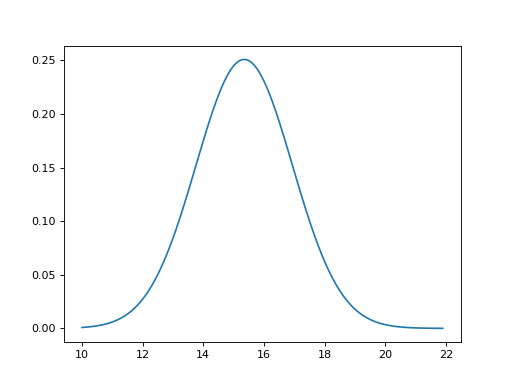

In [8]:
plt.figure()
plt.plot(x,y)

<IPython.core.display.Javascript object>


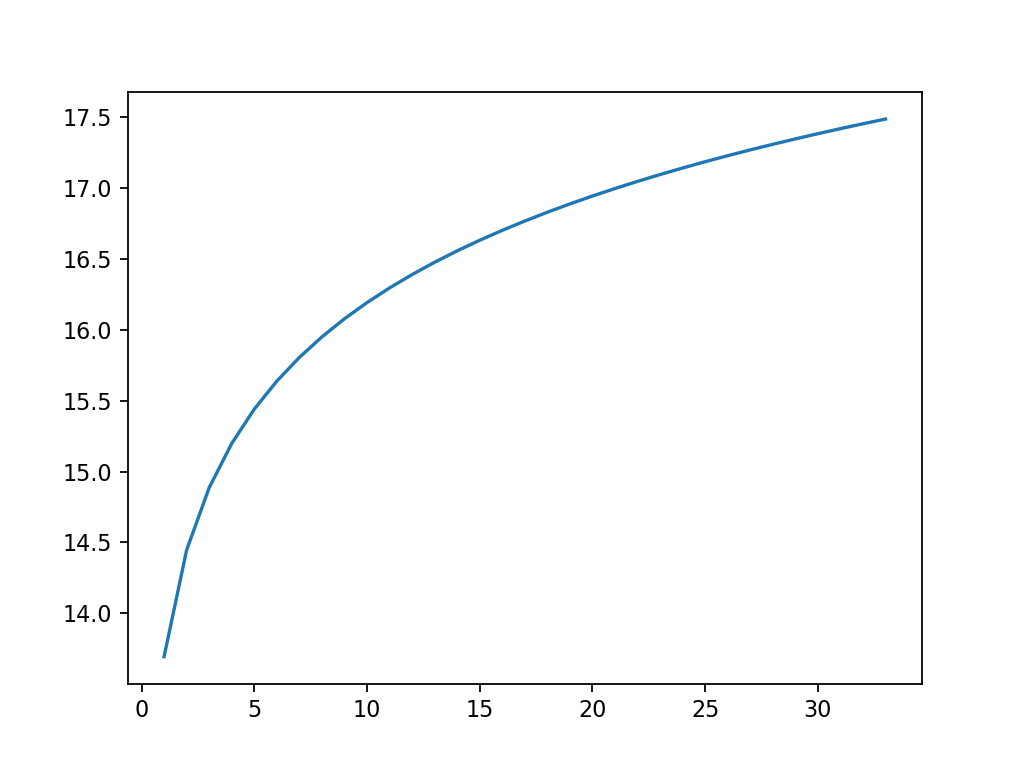

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
t = np.arange(0,1000,30)
plt.figure()
plt.plot(10+2.5*np.log10(t))
#plt.ylim(15,10)

In [16]:
life = Lifetime(21,x)

<IPython.core.display.Javascript object>


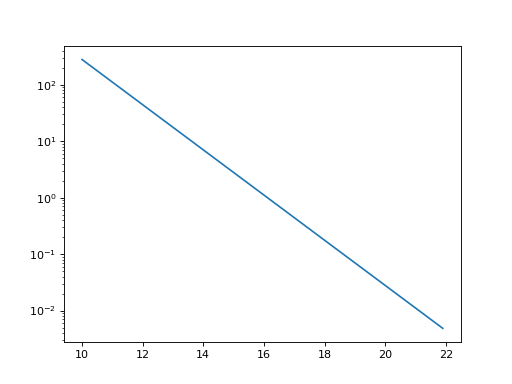

In [20]:
plt.figure()
plt.semilogy(x,life/90)

In [22]:
M_0_lim(21,90)

16.114393726401687

In [23]:
import scipy.integrate as integrate

/Users/ryanr/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/ryanr/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [26]:
integrate.quad(lambda x: Mag_dist(x),-np.inf,16)

(0.6586586263939984, 6.8969523553507e-09)

In [144]:
def GRB_prob(Lim,Time):
    """
    Calculate the probability that the GRB is observed.
    Inputs:
    -------
    Lim  - float, limiting magnitude
    Time - float, detection time in minutes
    
    Output:
    -------
    CDF - float, probability the random GRB is detectable
    """
    m0_lim = M_0_lim(Lim,Time)
    #plt.figure()
    #plt.hist(m0_lim.flatten(),bins =100)
    CDF = 1/2*(1+erf((m0_lim-mu)/(sig*np.sqrt(2))))
    return CDF

In [145]:
GRB_prob(mag,90)

array([[6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02],
       [6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02],
       [6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02, 6.52310188e-02, 6.52310188e-02, 6.52310188e-02,
        6.52310188e-02

In [149]:
def GRB_rate(Limit,Duration):
    """
    Calculate the expected number of detected GRBs for a given Kepler pixel.
    
    Inputs:
    -------
    Limit    - float, Kepler magnitude limit for a pixel
    Duration - float, duration of the K2 campaign in days
    
    Output:
    -------
    numbers - float, expected number of observed GRBs
    """
    rate = 300 / 365 / 41253 # GRB / day / deg2
    pix_area = (4 / 60 / 60)**2 # deg2
    if type(Limit) != int:
        pix_area = pix_area * Limit.shape[0] * Limit.shape[1]
    Duration = Duration / 365 # yr
    lifetime = 90 # min for 3 Kepler frames
    
    prob = GRB_prob(Limit,lifetime)
    
    number = rate * pix_area * Duration * prob
    
    return number
    

In [164]:
def Total_GRB_rate(Folder,Duration):
    """
    Calculate the expected number of GRBs observed in a K2 campaign.
    
    Inputs:
    -------
    Folder   - str, directory with limit frames 
    Duration - float, duration of the K2 campaign in days
    
    Output:
    numbers - float, expected number of observed GRBs
    """
    files = glob(Folder + '*.npy')
    numbers = 0.0
    for file in files:
        arr = np.load(file)
        data = arr[0] + arr[1]
        mag = -2.5*np.log10(data) + 24.47
        num = GRB_rate(mag,Duration)
        numbers += np.nansum(num)
    return numbers


In [161]:
from tqdm import trange
path = '../../Data/Limit/c01/Limit/'

In [162]:
c01_number = Total_GRB_rate(path, 81)


  0%|          | 0/18529 [00:00<?, ?it/s]/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10

 68%|██████▊   | 12557/18529 [00:33<00:39, 152.12it/s]


100%|█████████▉| 18527/18529 [00:49<00:00, 472.39it/s]
                                                      

In [163]:
c01_number

0.00701056203704275

In [165]:
paths = glob('../../Data/Limit/c*/Limit/')

In [167]:
numbers = []
durations = [83,79,80,81,81,81,69]
for i in range(len(paths)):
    num = Total_GRB_rate(paths[i],durations[i])
    numbers += [num]

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


In [168]:
numbers

[0.007183662334253732,
 0.0019878162561089616,
 0.001869577018689066,
 0.0033741466490449343,
 0.0025627653282209676,
 0.0016587153869442785,
 0.002674380019483431]

In [169]:
np.nansum(numbers)

0.02131106299274537

In [78]:
np.isfinite(mag).shape

(22, 23)

In [97]:
[1].shape

AttributeError: 'list' object has no attribute 'shape'

In [81]:
ind[1]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,  0,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
       15, 16, 17, 18, 19, 20, 21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,  0,  1,  2,
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15, 16, 17, 18

<IPython.core.display.Javascript object>


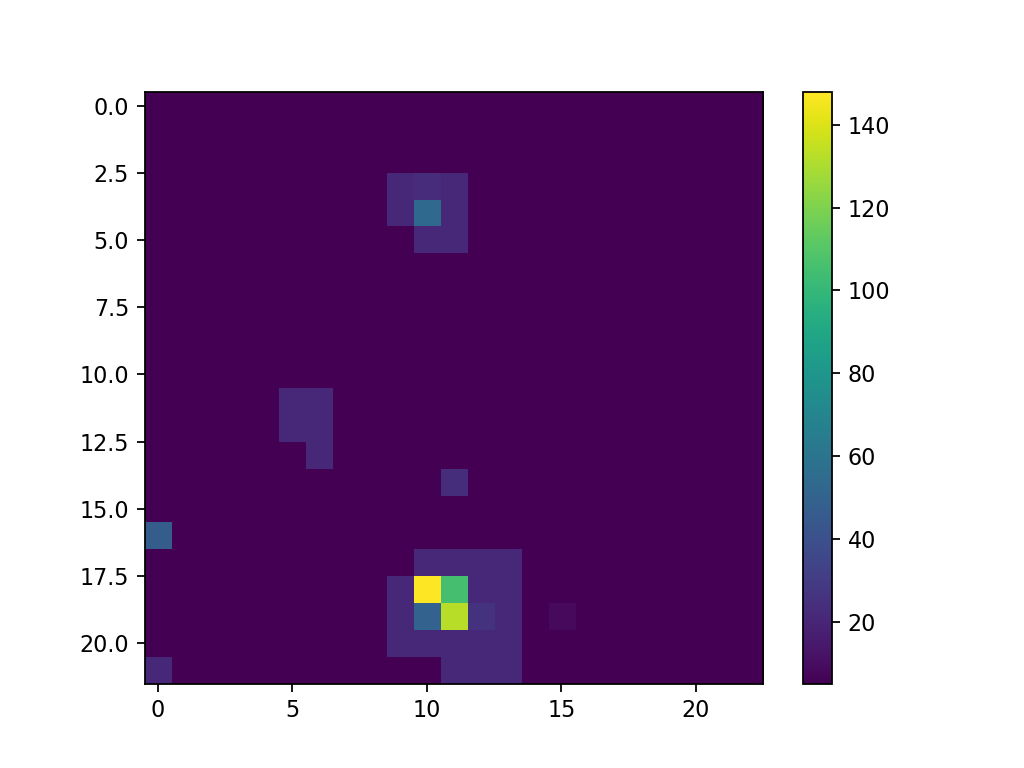

In [60]:
plt.figure()
plt.imshow(d[0]+d[1])
plt.colorbar()

In [98]:
data =d[0]+d[1] 

In [104]:
mag = M_0_lim(-2.5*np.log10(data) + 24.47,90)

In [150]:
GRB_rate(mag,80)

array([[1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10],
       [1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10],
       [1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10, 1.74781669e-10, 1.74781669e-10, 1.74781669e-10,
        1.74781669e-10

In [107]:
from scipy.special import erf

In [110]:
1/2*(1-erf(x-mu/(sig*np.sqrt(2))))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1.,

In [127]:
def hack_prob(GRB_mag_lim):
    mu = 15.35
    sig = 1.59
    CDF = 1/2*(1+erf((GRB_mag_lim-mu)/(sig*np.sqrt(2))))
    return CDF

In [129]:
hack_prob(mag)

array([[0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037],
       [0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037],
       [0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.94067037, 0.94067037, 0.94067037, 0.94067037,
        0.94067037, 0.93272415, 0.94067037],
       [0.94067037, 0.94067037, 0.94067037, 0.940

In [124]:
mu = 15.35
sig = 1.59
CDF = 1/2*(1+erf(mag-mu/(sig*np.sqrt(2))))

<IPython.core.display.Javascript object>


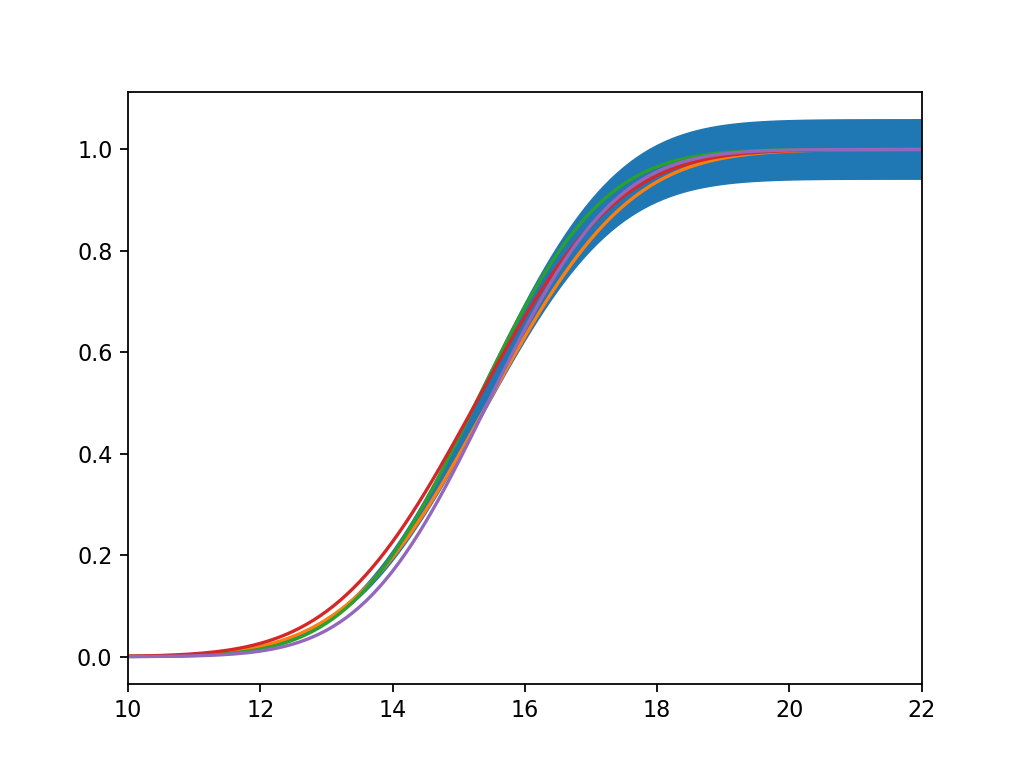

(10, 22)

In [198]:
x = np.arange(0,30,0.1)
plt.figure()
plt.plot(x,1/2*(1+erf((x-mu)/(sig*np.sqrt(2)))))
plt.plot(x,1/2*(1+erf((x-mu-0.09)/((sig+0.09)*np.sqrt(2)))))
plt.plot(x,1/2*(1+erf((x-mu+0.09)/((sig-0.09)*np.sqrt(2)))))
plt.plot(x,1/2*(1+erf((x-mu+0.09)/((sig+0.09)*np.sqrt(2)))))
plt.plot(x,1/2*(1+erf((x-mu-0.09)/((sig-0.09)*np.sqrt(2)))))
plt.fill_between(x,s-0.06*s,s+0.06*s)
plt.xlim(10,22)

<IPython.core.display.Javascript object>


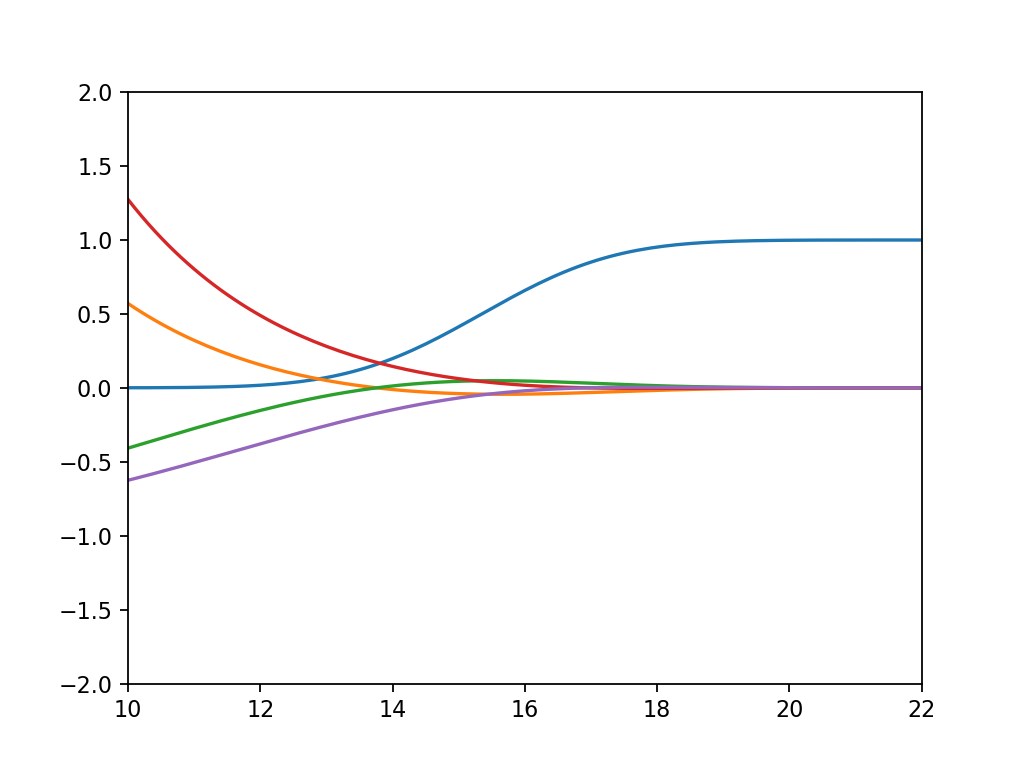

/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/ryanr/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


(-2, 2)

In [182]:
x = np.arange(0,30,0.1)
s = 1/2*(1+erf((x-mu)/(sig*np.sqrt(2))))
plt.figure()
plt.plot(x,1/2*(1+erf((x-mu)/(sig*np.sqrt(2)))))
plt.plot(x,((1/2*(1+erf((x-mu-0.09)/((sig+0.09)*np.sqrt(2)))))-s)/s)
plt.plot(x,((1/2*(1+erf((x-mu+0.09)/((sig-0.09)*np.sqrt(2)))))-s)/s)
plt.plot(x,((1/2*(1+erf((x-mu+0.09)/((sig+0.09)*np.sqrt(2)))))-s)/s)
plt.plot(x,((1/2*(1+erf((x-mu-0.09)/((sig-0.09)*np.sqrt(2)))))-s)/s)
plt.xlim(10,22)
plt.ylim(-2,2)

In [199]:
300/41253

0.007272198385571959

# Off axis 

In [112]:
import numpy as np
import afterglowpy as grb

jetType = -1     # top hat jet

thetaObs = 0.0  # Viewing angle in radians
E0 = 1.0e53      # Isotropic-equivalent energy in erg
thetaC = 0.1     # Half-opening angle in radians
thetaW = 0.1     # Truncation angle, unused for top-hat
b = 0            # power law index, unused for top-hat
n0 = 1.0         # circumburst density in cm^{-3}
p = 2.2          # electron energy distribution index
eps_e = 0.1      # epsilon_e
eps_B = 0.01     # epsilon_B
xi_N = 1.0       # Fraction of electrons accelerated
z = 0.1         # redshift
dL = cosmo.luminosity_distance(z).to(u.cm).value      # Luminosity distance in cm


# Space time points geometrically, from 10^3 s to 10^7 s
t = np.geomspace(1.0e2, 1.0e7, 3000)

# Calculate flux in a single X-ray band (all times have same frequency)
nu = np.empty(t.shape)
nu[:] = 5.19e14

# For convenience, place positional arguments in an array,
# and keywords into a dict

Y = np.array([thetaObs, E0, thetaC, thetaW, b, 0, 0, 0,
              n0, p, eps_e, eps_B, xi_N, dL])
Z = {'z': z}

# Calculate!

Fnu = grb.fluxDensity(t, nu, jetType, 0, *Y, **Z) * u.mJy # give it units
Fnu = Fnu.to(u.erg / u.s/ u.cm**2 / u.Hz).value # convert to cgs
mag = -2.5*np.log10(Fnu) -48.6 # calculate mag

<IPython.core.display.Javascript object>


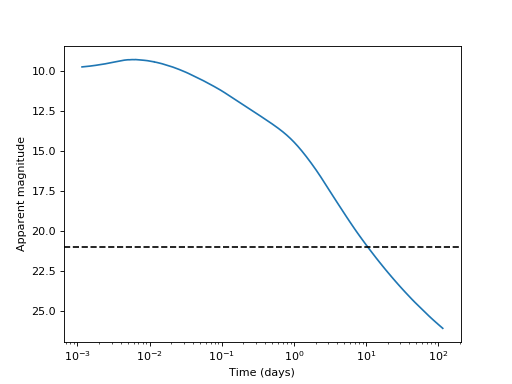

Text(0.5, 0, 'Time (days)')

In [113]:
#plt.figure()
#plt.loglog(t,Fnu)

plt.figure()
plt.semilogx(t/(60**2 * 24),mag)
plt.axhline(21,ls='--',color='k')
plt.gca().invert_yaxis()
plt.ylabel('Apparent magnitude')
plt.xlabel('Time (days)')

In [80]:
 a= 1 * u.mJy

In [87]:
a.to(u.erg / u.s/ u.cm**2 / u.Hz)

<Quantity 1.e-26 erg / (cm2 Hz s)>